# Image Fundamentals

Images are basically 2D or 3D arrays where each element in the array represent a pixel value

## Grey scale Image

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

pd.set_option('display.max_colwidth', None)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


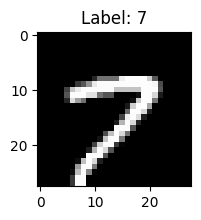

    0   1   2   3   4   5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21  22  23  24  25  26  27
0    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
1    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
2    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
3    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
4    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
5    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
6    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0  

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
i = 123

plt.figure(figsize=(2,2))
plt.imshow(x_train[i], cmap='gray')
plt.title(f"Label: {y_train[i]}")
plt.show()
data = pd.DataFrame(x_train[i])
print(data.to_string())

Please submit your feedback via https://futurepicx.com/feedback?id=2487AD91-5429-431C-902C-451AD5055F1A

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout

In [4]:
# Preprocess the data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [8]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3,3),
                     activation='relu',
                     input_shape=(28, 28, 1)))
cnn_model.add(MaxPool2D((2,2)))
cnn_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPool2D((2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10, activation='softmax'))

In [9]:
# Compile the model
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Train the model
cnn_history = cnn_model.fit(x_train,
                    y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9920 - loss: 0.0290 - val_accuracy: 0.9883 - val_loss: 0.0427
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9909 - loss: 0.0321 - val_accuracy: 0.9899 - val_loss: 0.0450
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9925 - loss: 0.0247 - val_accuracy: 0.9889 - val_loss: 0.0575
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9916 - loss: 0.0322 - val_accuracy: 0.9897 - val_loss: 0.0529
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9935 - loss: 0.0237 - val_accuracy: 0.9865 - val_loss: 0.0718
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9926 - loss: 0.0265 - val_accuracy: 0.9905 - val_loss: 0.0568
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9927 - loss: 0.0273 - val_accuracy: 0.9894 - val_loss: 0.0532
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9939 - loss: 0.02

In [22]:
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 - 1s - 2ms/step - accuracy: 0.9892 - loss: 0.0572
Test Accuracy: 98.92%


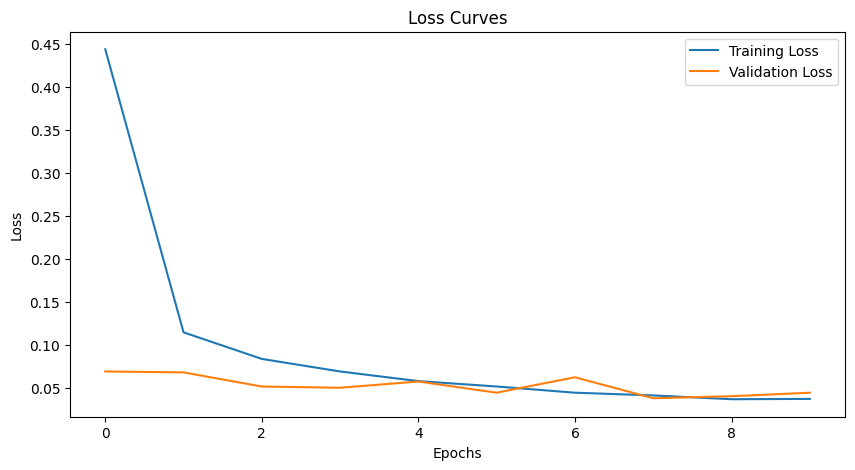

In [11]:
# Plot train and test loss curves
plt.figure(figsize=(10, 5))
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

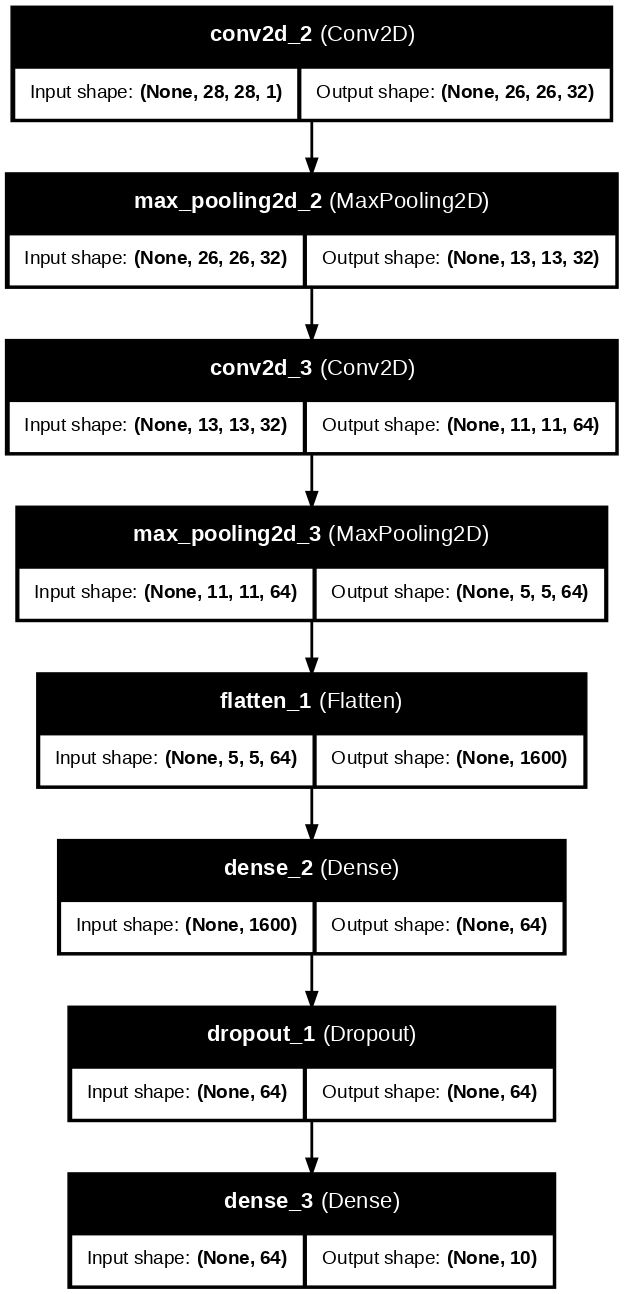

In [20]:
# Save and display the model architecture image
plot_model(cnn_model, to_file='model_architecture.png',\
           show_shapes=True, show_layer_names=True, dpi=100)

# Display the saved model architecture
from IPython.display import Image
Image(filename='model_architecture.png')

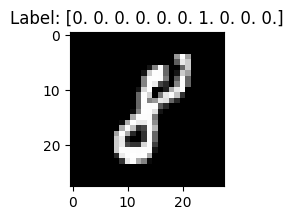

In [23]:
index = 3245
plt.figure(figsize=(2,2))
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Label: {y_train[index]}")
plt.show()

In [15]:
probs = cnn_model.predict(x_test[index].reshape(1,28,28,1))
np.argmax(probs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


np.int64(8)

In [19]:
cnn_model.save('cnn_model.keras')

In [ ]:
# !pip install opencv-python

import cv2
# import numpy as np

cnn_model = keras.saving.load_model("cnn_model.keras")

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
    normalized = resized / 255.0
    reshaped = normalized.reshape(1, 28, 28, 1)

    # Make a prediction
    prediction = cnn_model.predict(reshaped)
    predicted_digit = np.argmax(prediction)

    # Display the result
    cv2.putText(frame, f"Predicted Digit: {predicted_digit}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Webcam Feed", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()